<a href="https://colab.research.google.com/github/jose-marquez89/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# write a function
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, thresh=None):
  '''Returns the probability of being drunk given a positive
     test result. "thresh" parameter can be changed to a percentage
     to arrive at the number of necessary tests to attain given
     percentage'''
  p_dd = prob_drunk_prior
  p_not_dd = 1 - p_dd
  p_pos_given_dd = 0.92
  p_pos_given_not_dd = false_positive_rate

  p = (p_pos_given_dd*p_dd)/((p_pos_given_dd*p_dd)+(p_pos_given_not_dd*p_not_dd))

  # some recursion

  test_results = []

  if thresh == None:
    return p
  else:
    test_results.append(p)
    while p < thresh:
      p = prob_drunk_given_positive(p, false_positive_rate)
      test_results.append(p)
    for r in range(len(test_results)):
      if r < len(test_results) - 1:
        print("Test #%i: %f" % (r+1, test_results[r]))
      else:
        print("Final Test: %f" % (test_results[r]))

In [0]:
# test function

# single test
prob_drunk_given_positive(.001, 0.08)

0.011380504700643244

In [0]:
# multiple tests
prob_drunk_given_positive(.001, 0.08, thresh=0.95)

Test #1: 0.011381
Test #2: 0.116906
Test #3: 0.603552
Test #4: 0.945968
Final Test: 0.995058


In [0]:
# visualization of Bayes vs Frequentist confidence interval
import pandas as pd
import seaborn as sns
import numpy as np

# get data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-12-11 22:45:01--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2019-12-11 22:45:01 (461 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [0]:
# load data
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party', 'handicapped-infants', 'water-project',
                        'budget', 'physician-fee-freeze', 'el-salvador-aid',
                        'religious-groups', 'anti-satellite-ban', 
                        'aid-to-contras', 'mx-missile', 'immigration',
                        'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free',
                        'south-africa'])


# Replace question marks and yes/no values
df = df.replace({'?':np.NaN, 'n': 0, 'y':1})

# separate the data into democrat and republican

# republicans
rep = df[df['party'] == "republican"]
dem = df[df['party'] == 'democrat']

# clean this column for the example (especially graphic)
dem['anti-satellite-ban'] = dem['anti-satellite-ban'].fillna(method='bfill')

# traditional confidence interval
def trad_interval(data, confidence=0.95):
  mean = np.mean(data)
  n = len(data)
  sterr = (np.std(data, ddof=1) / np.sqrt(n))
  moe = sterr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - moe, mean + moe)

In [0]:
# define plot points
from scipy import stats
trad_mean, trad_low, trad_high = trad_interval(dem['anti-satellite-ban'])

mean, var, std = stats.bayes_mvs(dem['anti-satellite-ban'])

bay_mean = mean[0]

bay_low, bay_high = mean[1]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [0]:
# # making a dataframe for plot
# import matplotlib.pyplot as plt

# means = pd.Series([bay_mean, trad_mean])
# methods = pd.Series(["Bayesian", "Traditional"])

# data = {'means': means, 'method': methods}

# table = pd.DataFrame(data=data)
# table.head()

# sns.barplot(x='means', y='method', data=table, ci=None)
# plt.errorbar(x=[0, 1], y=[table['means'], yerr=()])

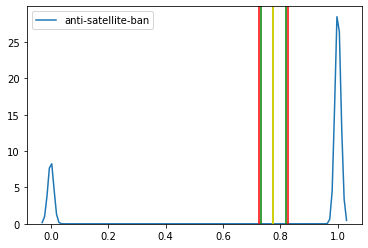

In [107]:
sns.kdeplot(dem['anti-satellite-ban'], bw=.01)

plt.axvline(x=trad_low, color='red')
plt.axvline(x=trad_high, color='red')
plt.axvline(x=trad_mean, color='k')

plt.axvline(x=bay_low, color='green')
plt.axvline(x=bay_high, color='green')
plt.axvline(x=bay_mean, color='yellow');

# My Interpretation of Bayesian and Frequentist Statistics

While frequentist statistics do not depend on prior information and assume a
hypothesis is true, bayesian statistics rely on gathering prior information in order to establish a level probability.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!